In [12]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

#깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

#피마 인디언 당뇨병 데이터를 가져옵니다
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

#세부 정보를 X로 지정합니다
X=df.iloc[:,0:8]

#당뇨병여부를 y로 지정합니다
y= df.iloc[:,8]


fatal: destination path 'data' already exists and is not an empty directory.


In [13]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


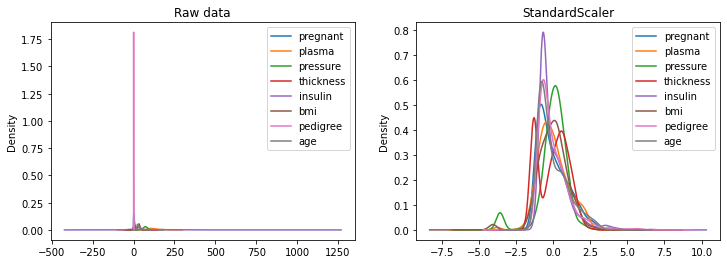

In [20]:
ss=StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
fig,ax= plt.subplots(1,2,figsize=(12,4))
X.plot(kind='kde',title='Raw data',ax=ax[0])
scaled_X.plot(kind='kde',title='StandardScaler',ax=ax[1])
plt.show()

In [22]:
#학습셋과 테스트셋을 75:25로 나눕니다
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [41]:
# 결정트리 분류기를 불러옵니다
from sklearn.tree import DecisionTreeClassifier

# 학습 환경을 설정합니다
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

#테스트 셋에 적용합니다
y_pred = classifier.predict(X_test)

# 계층별 교차검증 환경을 설정합니다
skf = StratifiedKFold(n_splits=10,shuffle=True)

#교차 검증을 통해 정확도를 계산합니다.
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

#정확도와 표준편차를 출력합니다
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 70.32 %
Standard Deviation: 3.84 %


In [44]:
# 랜덤포레스트 분류기를 불러옵니다
from sklearn.ensemble import RandomForestClassifier

# 학습환경을 설정합니다
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 74.64 %
Standard Deviation: 5.76 %


In [45]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 74.82 %
Standard Deviation: 6.99 %


In [57]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf=StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 71.03 %
Standard Deviation: 7.10 %


In [59]:
from sklearn.ensemble import AdaBoostClassifier

calssfier = AdaBoostClassifier()
classifier.fit(X_train,y_train)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Acciracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Acciracy: 70.14 %
Standard Deviation: 4.10 %


In [60]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 74.30 %
Standard Deviation: 6.42 %


In [65]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 74.67 %
Standard Deviation: 6.40 %


In [66]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 74.85 %
Standard Deviation: 6.28 %


In [67]:
from sklearn.ensemble import VotingClassifier

clf1=AdaBoostClassifier()
clf2=RandomForestClassifier()
clf3=SVC(kernel='linear')

classifier = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)])
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 74.81 %
Standard Deviation: 5.57 %


In [68]:
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=10)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 73.77 %
Standard Deviation: 3.01 %


Mean accuracy of D_tree : 67.35 %
Mean accuracy of RF : 74.31 %
Mean accuracy of GNB : 76.06 %
Mean accuracy of KNN : 69.65 %
Mean accuracy of Ada : 76.41 %
Mean accuracy of QDA : 73.98 %
Mean accuracy of SVM_1 : 73.61 %
Mean accuracy of SVM_k : 72.42 %
Mean accuracy of voting : 73.95 %
Mean accuracy of bagging : 75.34 %


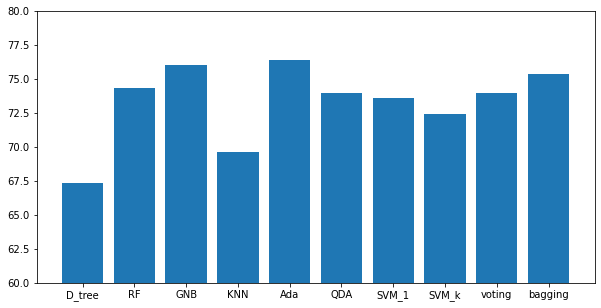

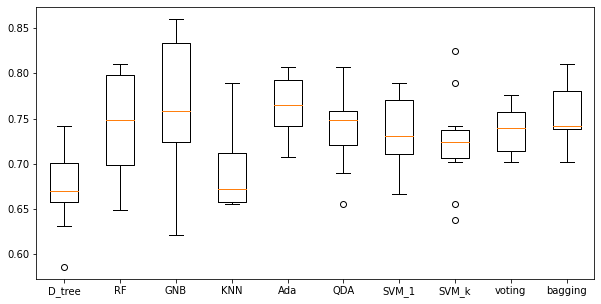

In [69]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                            ('2',RandomForestClassifier()),
                                            ('3',SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=clf3,n_estimators=10,
                                 random_state=0)]

classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'voting',
                    'bagging'
                    ]

modelaccuracies = []
modelmeans = []
modelnames = []

classifier_data = zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier, X=X_train,y=y_train,cv=skf)
  print("Mean accuracy of",classifier_name,': {:.2f} %'.format(accuracies.mean()*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(modelnames,modelmeans)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()
